<a href="https://colab.research.google.com/github/skishanColab/AI_MLPractice/blob/main/LinearRegression_WeatherPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8
              Temp
count  3650.000000
mean     11.177753
std       4.071837
min       0.000000
25%       8.300000
50%      11.000000
75%      14.000000
max      26.300000
R² score: 0.6204830666064225
MSE: 6.327393262725934


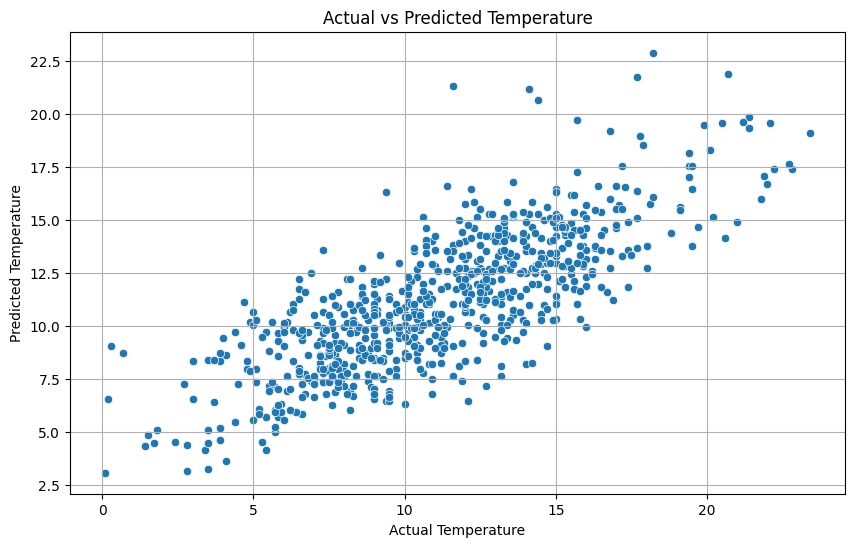

In [1]:
# Step 1: Install dependencies
!pip install pandas matplotlib scikit-learn seaborn

# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 3: Load sample weather data (using a public dataset)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url)

# Step 4: Explore the data
print(data.head())
print(data.describe())

# Rename for simplicity
data = data.rename(columns={"Temp": "Temperature"})

# Step 5: Feature engineering (create a simple feature: previous day temp)
data["Prev_Temp"] = data["Temperature"].shift(1)
data = data.dropna()

# Step 6: Split data
X = data[["Prev_Temp"]]
y = data["Temperature"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Predict
y_pred = model.predict(X_test)

# Step 9: Evaluate
print("R² score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Step 10: Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.grid(True)
plt.show()


In [3]:
# Step 1: Install required packages
!pip install gradio pandas scikit-learn matplotlib

# Step 2: Imports
import pandas as pd
import gradio as gr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 3: Load and prepare data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url)
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data.rename(columns={'Temp': 'Temperature'}, inplace=True)

X = data[['Year', 'Month', 'Day']]
y = data['Temperature']

# Train model
model = LinearRegression()
model.fit(X, y)

# Step 4: Prediction function
def predict_temperature(year, month, day):
    input_data = pd.DataFrame([[year, month, day]], columns=['Year', 'Month', 'Day'])
    prediction = model.predict(input_data)[0]
    return f"Predicted Temperature: {prediction:.2f} °C"

# Step 5: Gradio Interface
interface = gr.Interface(
    fn=predict_temperature,
    inputs=[
        gr.Number(label="Year"),
        gr.Number(label="Month"),
        gr.Number(label="Day")
    ],
    outputs="text",
    title="🌤️ Temperature Prediction using Linear Regression",
    description="Enter a date (Year, Month, Day) to predict the minimum temperature in Melbourne, Australia."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://333df198c98a2c37d6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
